In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('coffee_words.pickle','rb') as read_file:
    coffee = pickle.load(read_file)
with open('coffee_ratings.pickle','rb') as read_file:
    ratings = pickle.load(read_file)

In [75]:
with open('three_groups.pickle','rb') as read_file:
    three_groups = pickle.load(read_file)

In [7]:
ratings.head()

,Overall,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Body,Flavor,Aftertaste,Acidity
Jackrabbit Java,93,"Thermopolis, Wyoming",Costa Rica,Medium-Light,54/72,$20.00/12 ounces,February 2021,9,9,9,8,8
Jackrabbit Java,92,"Thermopolis, Wyoming","Nyamasheke District, Rwanda",Medium-Light,58/76,$20.00/12 ounces,February 2021,9,8,9,8,8
Red Rooster Coffee Roaster,96,"Floyd, Virginia","Los Naranjos, La Argentina, Huila Department, ...",Light,64/84,$18.99/8 ounces,February 2021,9,9,10,9,9
Paradise Roasters,95,"Minneapolis, Minnesota","Huila, Colombia",Light,62/80,$16.95/6 ounces,February 2021,9,9,9,9,9
Kakalove Cafe,95,"Chia-Yi, Taiwan","Antioquia Department, Colombia",Medium-Light,60/80,NT $310/8 ounces,February 2021,9,9,9,9,9


In [10]:
ratings.Aroma.isnull().sum()

51

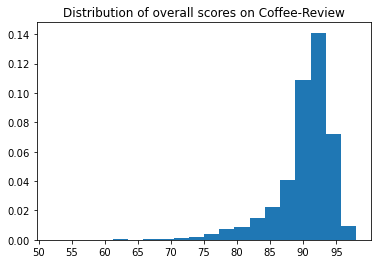

In [5]:
scores = ratings[ratings.Overall != 'NR'].Overall.astype(int)
plt.hist(sorted(scores), bins=20,density=True)
plt.xticks(np.arange(50,100,5))
plt.title('Distribution of overall scores on Coffee-Review')
plt.show();

Text(0.5, 1.0, 'Acidity')

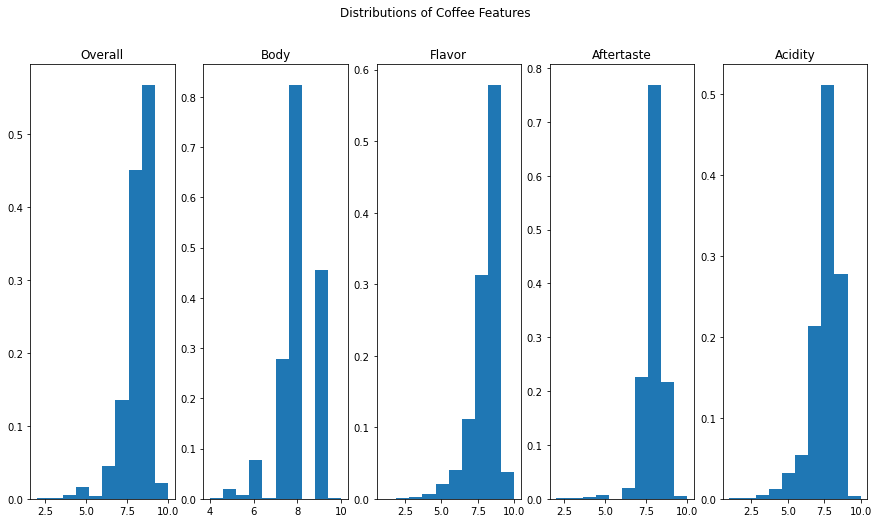

In [74]:
fig, axs = plt.subplots(1, 5, figsize=(15,8))
fig.suptitle('Distributions of Coffee Features')

aroma = ratings[(ratings.Aroma != 'NR')&(ratings.Aroma != 'NA')&(ratings.Aroma.isnull() == False)].Aroma.astype(float)
axs[0].hist(sorted(aroma),density=True)
axs[0].set_title('Overall')
body = ratings[(ratings.Body != 'NR')&(ratings.Body != 'NA')&(ratings.Body.isnull() == False)].Body.astype(float)
axs[1].hist(sorted(body),density=True)
axs[1].set_title('Body')
flavor = ratings[(ratings.Flavor != 'NR')&(ratings.Flavor != 'NA')&(ratings.Flavor.isnull() == False)].Flavor.astype(float)
axs[2].hist(sorted(flavor),density=True)
axs[2].set_title('Flavor')
aftertaste = ratings[(ratings.Aftertaste != 'NR')&(ratings.Aftertaste != 'NA')&(ratings.Aftertaste.isnull() == False)].Aftertaste.astype(float)
axs[3].hist(sorted(aftertaste),density=True)
axs[3].set_title('Aftertaste')
acidity = ratings[(ratings.Acidity != 'NR')&(ratings.Acidity != 'NA')&(ratings.Acidity != 'na')&(ratings.Acidity != 'n/a')&(ratings.Acidity != 'Very Low')&(ratings.Acidity != 'Low')&(ratings.Acidity != 'Moderate')&(ratings.Acidity.isnull() == False)].Acidity.astype(float)
axs[4].hist(sorted(acidity),density=True)
axs[4].set_title('Acidity')
# for ax in fig.get_axes():
#     ax.label_outer()

In [79]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [76]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
train = coffee

In [ ]:
print(word_tokenize(coffee.Review[0]))

In [ ]:
trial = coffee.Review[1]+coffee.Notes[1]+coffee.TLDR[1]
trial

In [ ]:
preprocess_textlemma(trial)

In [80]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [ ]:
textblob_object = TextBlob(trial)
tb_words = textblob_object.words
print(tb_words)
Word(tb_words)

In [ ]:
for noun_phrase in textblob_object.noun_phrases:
    print(noun_phrase.correct().lower())

In [95]:
words_0 = ''
for row in three_groups[(three_groups.group == 0 )&(three_groups.roast_level != 'NA')].roast_level:
    words_0 += row + ' '
for row in three_groups[(three_groups.group == 0 )&(three_groups.roast_level != 'NA')].origin:
    words_0 += row + ' '
words_1 = ''
for row in three_groups[(three_groups.group == 1 )&(three_groups.roast_level != 'NA')].roast_level:
    words_1 += row + ' '
for row in three_groups[(three_groups.group == 1 )&(three_groups.roast_level != 'NA')].origin:
    words_1 += row + ' '
words_2 = ''
for row in three_groups[(three_groups.group == 2 )&(three_groups.roast_level != 'NA')].roast_level:
    words_2 += row + ' '
for row in three_groups[(three_groups.group == 2 )&(three_groups.roast_level != 'NA')].origin:
    words_2 += row + ' '

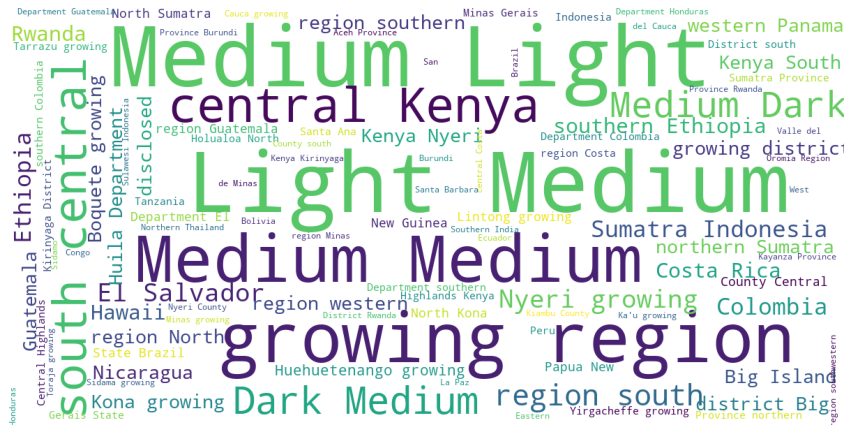

In [96]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=42    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_0)

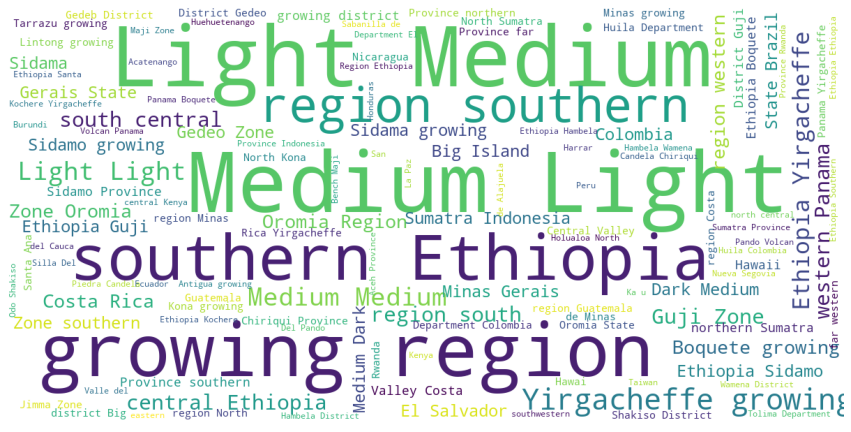

In [97]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=42    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_1)

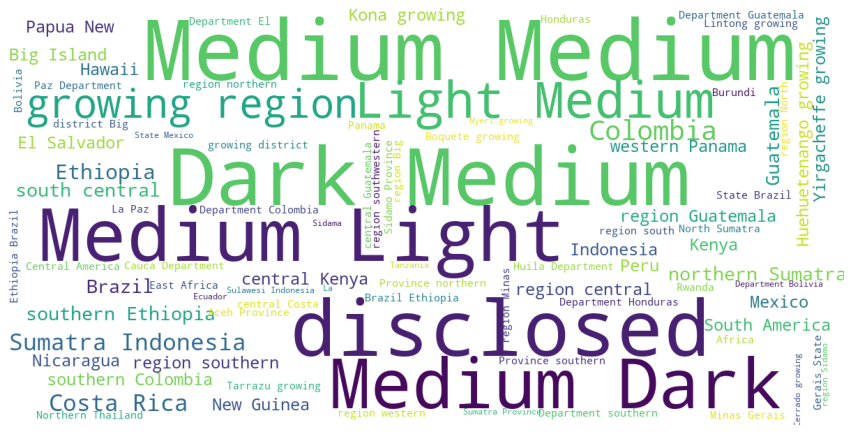

In [98]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=42    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_2)

## Combine the review, notes, and summary columns of the review into one note. Remove any websites and the common final sentence about phone numbers or visiting Facebook

In [ ]:
df = pd.DataFrame()
df['Roaster'] = coffee['Roaster']
df['TextA'] = coffee.Review + coffee.Notes + coffee.TLDR
# for ind in range(len(df)):   
# df['TextA'] = re.sub('[^ ]+\.[^ ]+','',df.Total.str)
# df['TextB'] = re.sub(r'Visit.*\n?','',df.TextA.str)
df['TextB'] = df.TextA.str.replace('[^ ]+\.[^ ]+','',regex=True)
df['Text'] = df.TextB.str.replace(r'Visit.*\n?','',regex=True)
df.drop(columns=['TextA','TextB'],inplace=True)
df

In [ ]:
df.Text[4220]

In [ ]:
def preprocess_textstem(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
     # Lowercase and stem
    stemmer = LancasterStemmer()
    stems = [stemmer.stem(token.lower()) for token in tokens]
    
    # Remove stopwords
    keywords= [stem for stem in stems if stem not in stopwords.words('english')]
    return keywords

In [ ]:
# def preprocess_textchunks(text):
#     # Remove numbers
#     text = re.sub(r'\d+', '', text)
    
#     # Tokenise words while ignoring punctuation
#     tokeniser = RegexpTokenizer(r'\w+')
#     tokens = tokeniser.tokenize(text)
    
#      # Lowercase and stem
#     stemmer = LancasterStemmer()
#     stems = [stemmer.stem(token.lower()) for token in tokens]
    
#     # Remove stopwords
#     keywords= [stem for stem in stems if stem not in stopwords.words('english')]
#     return keywords

In [ ]:
def preprocess_textlemma(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

In [ ]:
# # Create an instance of TfidfVectorizer
# vectoriser = TfidfVectorizer(analyzer=preprocess_textstem)
# # Fit to the data and transform to feature matrix
# stem_X = vectoriser.fit_transform(train.Review)
# # Convert sparse matrix to dataframe
# stem_X = pd.DataFrame.sparse.from_spmatrix(stem_X)
# # Save mapping on which index refers to which words
# col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# # Rename each column using the mapping
# for col in stem_X.columns:
#     stem_X.rename(columns={col: col_map[col]}, inplace=True)
# stem_X

# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=preprocess_textlemma)
# Fit to the data and transform to feature matrix
lemma_X = vectoriser.fit_transform(df['Text'])
# Convert sparse matrix to dataframe
lemma_X = pd.DataFrame.sparse.from_spmatrix(lemma_X)
# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# Rename each column using the mapping
for col in lemma_X.columns:
    lemma_X.rename(columns={col: col_map[col]}, inplace=True)
lemma_X

In [ ]:
# Create an instance of TfidfVectorizer
vector = TfidfVectorizer(analyzer=preprocess_textlemma)
# Fit to the data and transform to feature matrix
lemma_text = vector.fit_transform(df.Text)
# Convert sparse matrix to dataframe
lemma_text = pd.DataFrame.sparse.from_spmatrix(lemma_text)
# Save mapping on which index refers to which words
col_map = {v:k for k, v in vector.vocabulary_.items()}
# Rename each column using the mapping
for col in lemma_text.columns:
    lemma_text.rename(columns={col: col_map[col]}, inplace=True)
lemma_text

In [ ]:
with open('reviews_stemmed.pickle', 'wb') as to_write:
    pickle.dump(stem_X, to_write)

In [ ]:
with open('reviews_lemma.pickle', 'wb') as to_write:
    pickle.dump(lemma_X, to_write)

In [ ]:
with open('reviews_stemmed.pickle','rb') as read_file:
    reviews_stemmed = pickle.load(read_file)

In [ ]:
with open('reviews_lemma.pickle','rb') as read_file:
    reviews_lemma = pickle.load(read_file)

In [ ]:
# Version of Reviews Stemmed and Numbers Removed
reviews_stemmed.head()

In [ ]:
# Version of Reviews Lemmatized
X_stem.head(10)

In [ ]:
from itertools import chain
from nltk.corpus import wordnet as wn
from difflib import get_close_matches as gcm
# lem = WordNetLemmatizer()
# possible_adjectives = [k.name for k in chain(*[j.pertainyms() for j in chain(*[lem.lemmatize(i) for i in wn.synsets('terribly')])])]
# # ['terrible', 'atrocious', 'awful', 'rotten']
# possible_adjectives
word = 'terrible'
possible_adj = []
for ss in wn.synsets(word):
    for lemmas in ss.lemmas(): # all possible lemmas
        for ps in lemmas.pertainyms(): # all possible pertainyms
            possible_adj.append(ps.name())
    possible_adj.append(word)
possible_adj[0]

In [ ]:
gcm('terribly',possible_adjectives)

In [ ]:
with open('stem_all.pickle', 'wb') as to_write:
    pickle.dump(stem_all, to_write)
with open('stem_all.pickle','rb') as read_file:
    stem_all = pickle.load(read_file)
stem_all.head(10)

In [ ]:
# Create an instance of TfidfVectorizer
vectoriser_LA = TfidfVectorizer(analyzer=preprocess_textlemma)
# Fit to the data and transform to feature matrix
lemma_all = vectoriser_LA.fit_transform(train.Review+train.Notes+train.TLDR)
# Convert sparse matrix to dataframe
lemma_all = pd.DataFrame.sparse.from_spmatrix(lemma_all)
# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_LA.vocabulary_.items()}
# Rename each column using the mapping
for col in lemma_all.columns:
    lemma_all.rename(columns={col: col_map[col]}, inplace=True)

In [ ]:
with open('lemma_all.pickle', 'wb') as to_write:
    pickle.dump(lemma_all, to_write)
with open('lemma_all.pickle','rb') as read_file:
    lemma_all = pickle.load(read_file)
lemma_all.head(10)

## Stuff to save

In [ ]:
# cv = CountVectorizer(stop_words='english')
# stemmer = LancasterStemmer()
# x = cv.fit_transform([coffee.Review[row] for row in range(len(coffee))])
# pd.DataFrame(x.toarray(), columns = cv.get_feature_names())